# Побудова нейронної мережі для розпізнавання шрифтів

### Підготовка наборів

Перед початком побудови нейронної мережі, слід підготувати тренувальний та валідаційні набори. Для цього було обрано 5 різних наборів шрифтів для кожної сімейства шрифтів (serif, sans-serif, monospace, script, display, handwritten), щоб модель змогла навчитися розрізняти ключові риси між сімействами, та навчитися розрізняти їх між собою всередині сімейства. В будь-якому випадку ми будемо будувати модель розпізнавання конкретних шрифтів, а не їх сімейств.

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

Для цього було створено функцію, яка завантажує набір, прибирає стовпці, які не будуть використовуватись під час навчання, створює зразок з 950 випадкових рядків набору (така кількість обумовлена тим, що деякі набори шрифтів містять таку мінімальну кількість записів і щоб в моделі не було перенавчання на окремих шрифтах, які можуть мати до 60000 рядків в наборі, ми беремо однакову кількість рядків для кожного набору шрифтів), та розподіляє їх на тренувальні та валідаційні зразки у відношенні 80:20 після чого додаємо до загальних тренувального та валідаційного наборів.

In [6]:
def create_train_test_datasets(font_paths):
    train_dataset = pd.DataFrame()
    test_dataset = pd.DataFrame()

    columns_to_drop = [
        'fontVariant', 
        'm_label', 
        'strength', 
        'italic', 
        'orientation', 
        'm_top',
        'm_left',
        'originalH',
        'originalW',
        'h',
        'w'
    ]

    for font_path in font_paths:
        dataset = pd.read_csv(font_path)
        dataset = dataset.drop(columns=columns_to_drop, errors='ignore')

        sample = dataset.sample(n=950, random_state=42)

        train_sample, test_sample = train_test_split(sample, test_size=0.2, random_state=42)

        train_dataset = pd.concat([train_dataset, train_sample], ignore_index=True)
        test_dataset = pd.concat([test_dataset, test_sample], ignore_index=True)

    return train_dataset, test_dataset

Навчання буде проводитись на таких шрифтах:

- serif:

    - BASKERVILLE
    - BELL
    - BERNARD
    - CALISTO
    - CENTAUR

- sans-serif:

    - AGENCY
    - BAUHAUS
    - BERLIN
    - BRITANNIC
    - BUXTON

- monospace

    - CONSOLAS
    - COURIER
    - MONOSPAC821
    - MONOTXT
    - SIMPLEX

- script:

    - BLACKADDER
    - BRUSH
    - COMMERCIALSCRIPT
    - EDWARDIAN
    - ENGLISH

- display:

    - BROADWAY
    - CASTELLAR
    - CURLZ
    - GUNPLAY
    - JOKERMAN

- handwritten:

    - BRADLEY
    - CHILLER
    - KRISTEN
    - RAGE
    - VINER

In [7]:
font_paths = [
    './fonts/serif/BASKERVILLE.csv',
    './fonts/serif/BELL.csv',
    './fonts/serif/BERNARD.csv',
    './fonts/serif/CALISTO.csv',
    './fonts/serif/CENTAUR.csv',

    './fonts/sans-serif/AGENCY.csv',
    './fonts/sans-serif/BAUHAUS.csv',
    './fonts/sans-serif/BERLIN.csv',
    './fonts/sans-serif/BRITANNIC.csv',
    './fonts/sans-serif/BUXTON.csv',

    './fonts/monospace/CONSOLAS.csv',
    './fonts/monospace/COURIER.csv',
    './fonts/monospace/MONOSPAC821.csv',
    './fonts/monospace/MONOTXT.csv',
    './fonts/monospace/SIMPLEX.csv',

    './fonts/script/BLACKADDER.csv',
    './fonts/script/BRUSH.csv',
    './fonts/script/COMMERCIALSCRIPT.csv',
    './fonts/script/EDWARDIAN.csv',
    './fonts/script/ENGLISH.csv',

    './fonts/display/BROADWAY.csv',
    './fonts/display/CASTELLAR.csv',
    './fonts/display/CURLZ.csv',
    './fonts/display/GUNPLAY.csv',
    './fonts/display/JOKERMAN.csv',

    './fonts/handwritten/BRADLEY.csv',
    './fonts/handwritten/CHILLER.csv',
    './fonts/handwritten/KRISTEN.csv',
    './fonts/handwritten/RAGE.csv',
    './fonts/handwritten/VINER.csv'
]

In [8]:
train_dataset, test_dataset = create_train_test_datasets(font_paths)

In [9]:
train_dataset

,font,r0c0,r0c1,r0c2,r0c3,r0c4,r0c5,r0c6,r0c7,r0c8,...,r19c10,r19c11,r19c12,r19c13,r19c14,r19c15,r19c16,r19c17,r19c18,r19c19
0,BASKERVILLE,1,1,1,1,1,74,255,255,255,...,255,255,255,255,74,1,1,1,1,1
1,BASKERVILLE,1,1,1,1,1,1,121,121,255,...,1,1,1,1,1,1,1,1,1,1
2,BASKERVILLE,1,1,154,255,255,226,183,183,183,...,183,183,183,212,255,255,255,255,255,52
3,BASKERVILLE,1,1,1,1,1,1,1,1,1,...,232,232,232,232,232,194,1,1,1,1
4,BASKERVILLE,227,243,255,255,255,255,255,255,255,...,241,227,227,227,247,255,255,255,255,134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22795,VINER,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
22796,VINER,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
22797,VINER,148,255,255,255,255,255,255,255,255,...,168,168,168,168,168,168,168,183,178,1
22798,VINER,1,1,1,1,37,168,255,232,1,...,1,40,242,174,1,1,1,1,1,1


In [10]:
test_dataset

,font,r0c0,r0c1,r0c2,r0c3,r0c4,r0c5,r0c6,r0c7,r0c8,...,r19c10,r19c11,r19c12,r19c13,r19c14,r19c15,r19c16,r19c17,r19c18,r19c19
0,BASKERVILLE,1,128,255,255,128,1,1,1,1,...,128,1,1,1,1,128,255,255,1,1
1,BASKERVILLE,1,1,1,1,1,1,1,1,1,...,15,1,1,1,1,1,1,1,1,1
2,BASKERVILLE,1,1,1,1,1,1,1,1,1,...,11,255,255,255,255,252,141,53,1,1
3,BASKERVILLE,1,1,1,1,1,1,1,1,1,...,255,255,255,255,255,255,49,1,1,1
4,BASKERVILLE,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,162,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,VINER,1,1,1,1,1,1,1,29,142,...,1,14,198,206,6,1,1,1,1,1
5696,VINER,1,1,1,134,255,255,244,1,1,...,255,255,255,255,255,255,134,1,1,1
5697,VINER,1,1,1,1,1,1,1,55,182,...,13,182,255,234,13,8,1,1,1,1
5698,VINER,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


Екпортуємо створені набори в csv формат для більш зручного використання у майбутньому.

In [12]:
train_dataset.to_csv('./final/train_dataset.csv', index=False)
test_dataset.to_csv('./final/test_dataset.csv', index=False)

### Підготовка тренувальних даних

Перед навчанням моделі імпортуємо створені набори, приберемо назви шрифтів, нормалізуємо та відцентруємо тренувальні дані та проведемо one-hot encode для назв шрифтів. 

In [24]:
import pandas as pd
import numpy as np
import scipy.ndimage
from tensorflow.keras.utils import to_categorical

In [17]:
def preprocess_data(train_path, test_path):
    train_dataset = pd.read_csv(train_path)
    test_dataset = pd.read_csv(test_path)

    X_train = train_dataset.drop('font', axis=1).values
    y_train = train_dataset['font'].values

    X_test = test_dataset.drop('font', axis=1).values
    y_test = test_dataset['font'].values

    X_train = X_train / 255.0
    X_test = X_test / 255.0

    mean_train = np.mean(X_train, axis=0)
    X_train_centered = X_train - mean_train
    X_test_centered = X_test - mean_train

    unique_labels = np.unique(y_train)
    label_to_index = {label: idx for idx, label in enumerate(unique_labels)}
    y_train_encoded = np.array([label_to_index[label] for label in y_train])
    y_test_encoded = np.array([label_to_index[label] for label in y_test])

    num_classes = len(unique_labels)

    y_train_one_hot = to_categorical(y_train_encoded, num_classes=num_classes)
    y_test_one_hot = to_categorical(y_test_encoded, num_classes=num_classes)

    return X_train_centered, X_test_centered, y_train_one_hot, y_test_one_hot, num_classes

In [130]:
train_url = "https://github.com/PavelKilko/applied-application-of-neural-networks/raw/refs/heads/master/lab-6-7/final/train_dataset.csv"
test_url = "https://github.com/PavelKilko/applied-application-of-neural-networks/raw/refs/heads/master/lab-6-7/final/test_dataset.csv"

In [131]:
X_train, X_test, y_train, y_test, num_classes = preprocess_data(train_url, test_url)

### Тренування моделі

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import pandas as pd

Проведемо експеримент навчання моделі з різною кількістю нейронів у вхідному шарі.

In [6]:
def build_and_train_model(neuron_count, X_train, y_train, X_test, y_test, num_classes):
    model = Sequential()
    
    model.add(Dense(neuron_count, input_shape=(X_train.shape[1],), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    history = model.fit(
        X_train, y_train,
        epochs=100,
        validation_data=(X_test, y_test),
        batch_size=256,
        callbacks=[early_stopping],
        verbose=0
    )

    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

    return model, history, test_loss, test_acc

Training model with 100 neurons in input layer...


2024-10-20 22:25:33.175493: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-10-20 22:25:33.176256: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2024-10-20 22:25:33.313650: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-10-20 22:25:33.320021: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 4060 Laptop GPU computeCapability: 8.9
coreClock: 2.25GHz coreCount: 24 deviceMemorySize: 7.65GiB deviceMemoryBandwidth: 238.45GiB/s
2024-10-20 22:25:33.320058: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2024-10-20 22:25:33.339857: I tensorflow/stream_executor/p

Training model with 250 neurons in input layer...


2024-10-20 22:25:54.672597: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 36480000 exceeds 10% of free system memory.


Training model with 500 neurons in input layer...


2024-10-20 22:26:11.307861: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 36480000 exceeds 10% of free system memory.


Training model with 1000 neurons in input layer...


2024-10-20 22:26:26.039924: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 36480000 exceeds 10% of free system memory.


Training model with 2000 neurons in input layer...


2024-10-20 22:26:39.921389: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 36480000 exceeds 10% of free system memory.


Training model with 4000 neurons in input layer...
Training model with 8000 neurons in input layer...
Training model with 16000 neurons in input layer...
Training model with 32000 neurons in input layer...
Training model with 64000 neurons in input layer...


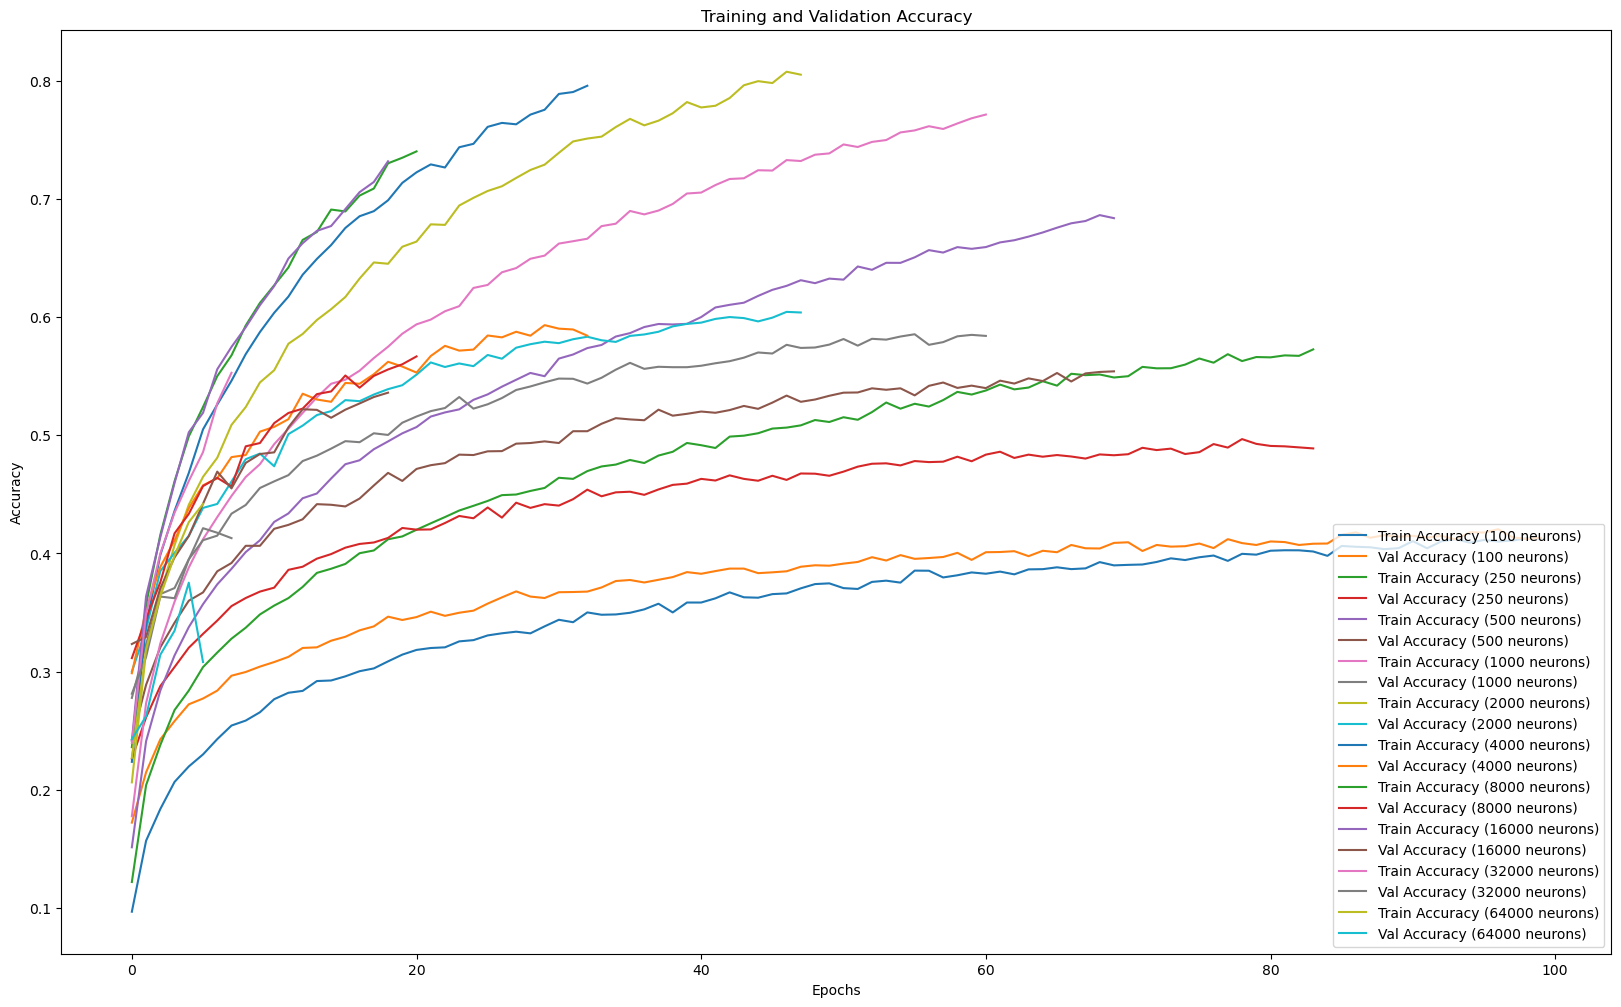

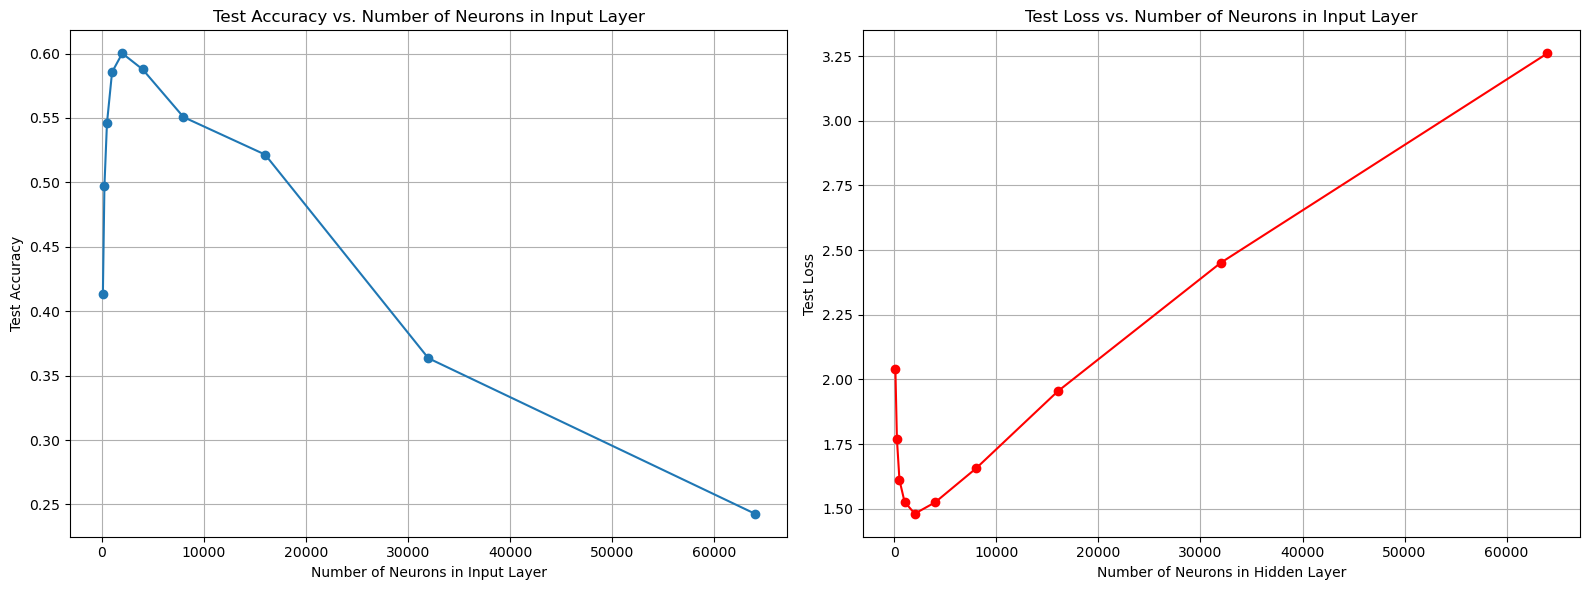

   Neuron Count  Test Accuracy  Test Loss
0           100       0.413158   2.040490
1           250       0.496842   1.770092
2           500       0.545965   1.611059
3          1000       0.585614   1.526825
4          2000       0.600175   1.480890
5          4000       0.587719   1.524965
6          8000       0.550702   1.655934
7         16000       0.521579   1.953652
8         32000       0.363509   2.451351
9         64000       0.242807   3.260801


In [7]:
neuron_counts = [100, 250, 500, 1000, 2000, 4000, 8000, 16000, 32000, 64000]

results = []

plt.figure(figsize=(20, 12))

for neuron_count in neuron_counts:
    print(f"Training model with {neuron_count} neurons in input layer...")

    model, history, test_loss, test_acc = build_and_train_model(neuron_count, X_train, y_train, X_test, y_test, num_classes)

    results.append({"Neuron Count": neuron_count, "Test Accuracy": test_acc, "Test Loss": test_loss})

    plt.plot(history.history['accuracy'], label=f'Train Accuracy ({neuron_count} neurons)')
    plt.plot(history.history['val_accuracy'], label=f'Val Accuracy ({neuron_count} neurons)')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

results_df = pd.DataFrame(results)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].plot(results_df['Neuron Count'], results_df['Test Accuracy'], marker='o')
ax[0].set_xlabel('Number of Neurons in Input Layer')
ax[0].set_ylabel('Test Accuracy')
ax[0].set_title('Test Accuracy vs. Number of Neurons in Input Layer')
ax[0].grid(True)

ax[1].plot(results_df['Neuron Count'], results_df['Test Loss'], marker='o', color='red')
ax[1].set_xlabel('Number of Neurons in Hidden Layer')
ax[1].set_ylabel('Test Loss')
ax[1].set_title('Test Loss vs. Number of Neurons in Input Layer')
ax[1].grid(True)

plt.tight_layout()
plt.show()

print(results_df)

Експеримент показав, що оптимальною кількістю нейронів у вхідному шарі є 2000, для отримання тестової точності в 60,0175%

Далі визначимо яку кількість нейронів слід використати у прихованому шарі, і чи покращить це взагалі результат моделі.

In [8]:
def build_and_train_model(neuron_count, X_train, y_train, X_test, y_test, num_classes):
    model = Sequential()
    
    model.add(Dense(2000, input_shape=(X_train.shape[1],), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(neuron_count, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    history = model.fit(
        X_train, y_train,
        epochs=100,
        validation_data=(X_test, y_test),
        batch_size=256,
        callbacks=[early_stopping],
        verbose=0
    )

    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

    return model, history, test_loss, test_acc

Training model with 100 neurons in hidden layer...
Training model with 250 neurons in hidden layer...
Training model with 500 neurons in hidden layer...
Training model with 1000 neurons in hidden layer...
Training model with 2000 neurons in hidden layer...
Training model with 4000 neurons in hidden layer...
Training model with 8000 neurons in hidden layer...
Training model with 16000 neurons in hidden layer...
Training model with 32000 neurons in hidden layer...
Training model with 64000 neurons in hidden layer...


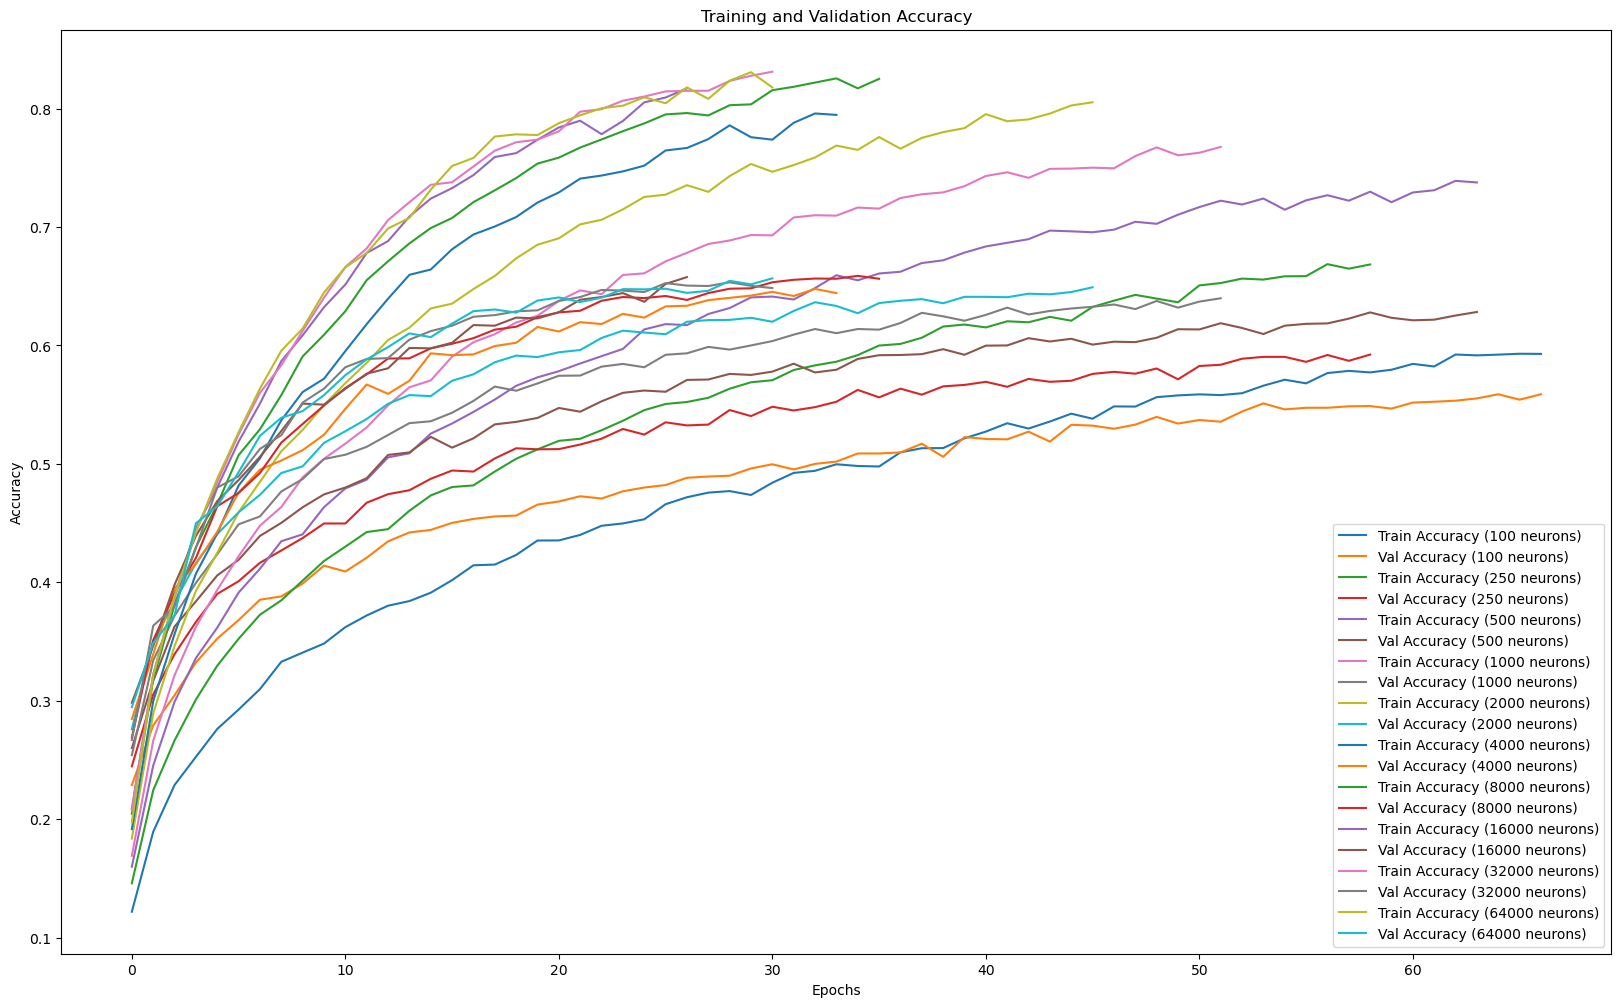

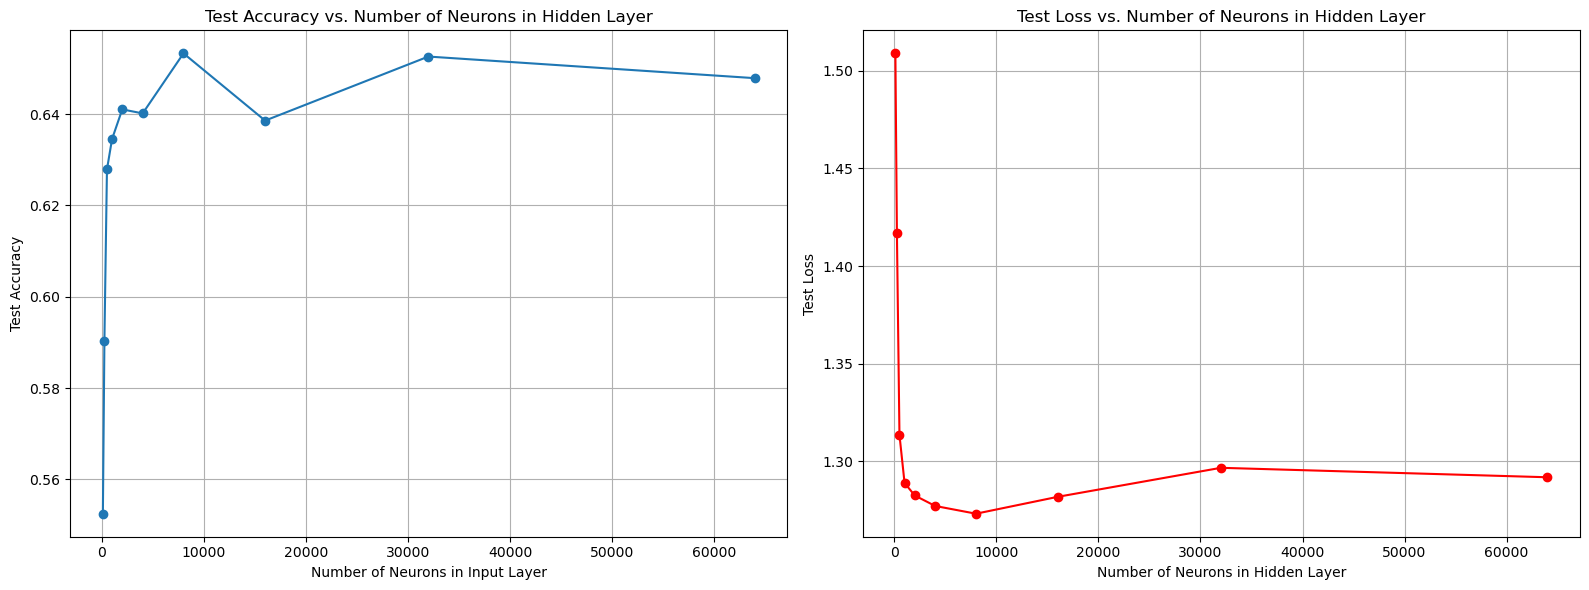

   Neuron Count  Test Accuracy  Test Loss
0           100       0.552456   1.509010
1           250       0.590351   1.417116
2           500       0.627895   1.313440
3          1000       0.634561   1.288812
4          2000       0.641053   1.282394
5          4000       0.640175   1.277028
6          8000       0.653333   1.273063
7         16000       0.638596   1.281705
8         32000       0.652632   1.296585
9         64000       0.647895   1.291744


In [10]:
neuron_counts = [100, 250, 500, 1000, 2000, 4000, 8000, 16000, 32000, 64000]

results = []

plt.figure(figsize=(20, 12))

for neuron_count in neuron_counts:
    print(f"Training model with {neuron_count} neurons in hidden layer...")

    model, history, test_loss, test_acc = build_and_train_model(neuron_count, X_train, y_train, X_test, y_test, num_classes)

    results.append({"Neuron Count": neuron_count, "Test Accuracy": test_acc, "Test Loss": test_loss})

    plt.plot(history.history['accuracy'], label=f'Train Accuracy ({neuron_count} neurons)')
    plt.plot(history.history['val_accuracy'], label=f'Val Accuracy ({neuron_count} neurons)')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

results_df = pd.DataFrame(results)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].plot(results_df['Neuron Count'], results_df['Test Accuracy'], marker='o')
ax[0].set_xlabel('Number of Neurons in Input Layer')
ax[0].set_ylabel('Test Accuracy')
ax[0].set_title('Test Accuracy vs. Number of Neurons in Hidden Layer')
ax[0].grid(True)

ax[1].plot(results_df['Neuron Count'], results_df['Test Loss'], marker='o', color='red')
ax[1].set_xlabel('Number of Neurons in Hidden Layer')
ax[1].set_ylabel('Test Loss')
ax[1].set_title('Test Loss vs. Number of Neurons in Hidden Layer')
ax[1].grid(True)

plt.tight_layout()
plt.show()

print(results_df)

Результати показують, що найкраща точність (65.3333%) досягнута при використанні 8000 нейронів у прихованому шарі. Водночас зменшення кількості нейронів до 2000 зменшує точність на 1.2280%, але при цьому ми зменшимо розмір остаточної моделі. Тому надалі продовжимо використовувати 2000 нейронів у прихованому шарі.

Далі дослідимо яку кількість нейронів слід використати у другому прихованому шарі і чи взагалі це покращить результати моделі.

In [11]:
def build_and_train_model(neuron_count, X_train, y_train, X_test, y_test, num_classes):
    model = Sequential()
    
    model.add(Dense(2000, input_shape=(X_train.shape[1],), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2000, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(neuron_count, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    history = model.fit(
        X_train, y_train,
        epochs=100,
        validation_data=(X_test, y_test),
        batch_size=256,
        callbacks=[early_stopping],
        verbose=0
    )

    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

    return model, history, test_loss, test_acc

Training model with 100 neurons in second hidden layer...
Training model with 250 neurons in second hidden layer...
Training model with 500 neurons in second hidden layer...
Training model with 1000 neurons in second hidden layer...
Training model with 2000 neurons in second hidden layer...
Training model with 4000 neurons in second hidden layer...
Training model with 8000 neurons in second hidden layer...
Training model with 16000 neurons in second hidden layer...
Training model with 32000 neurons in second hidden layer...
Training model with 64000 neurons in second hidden layer...


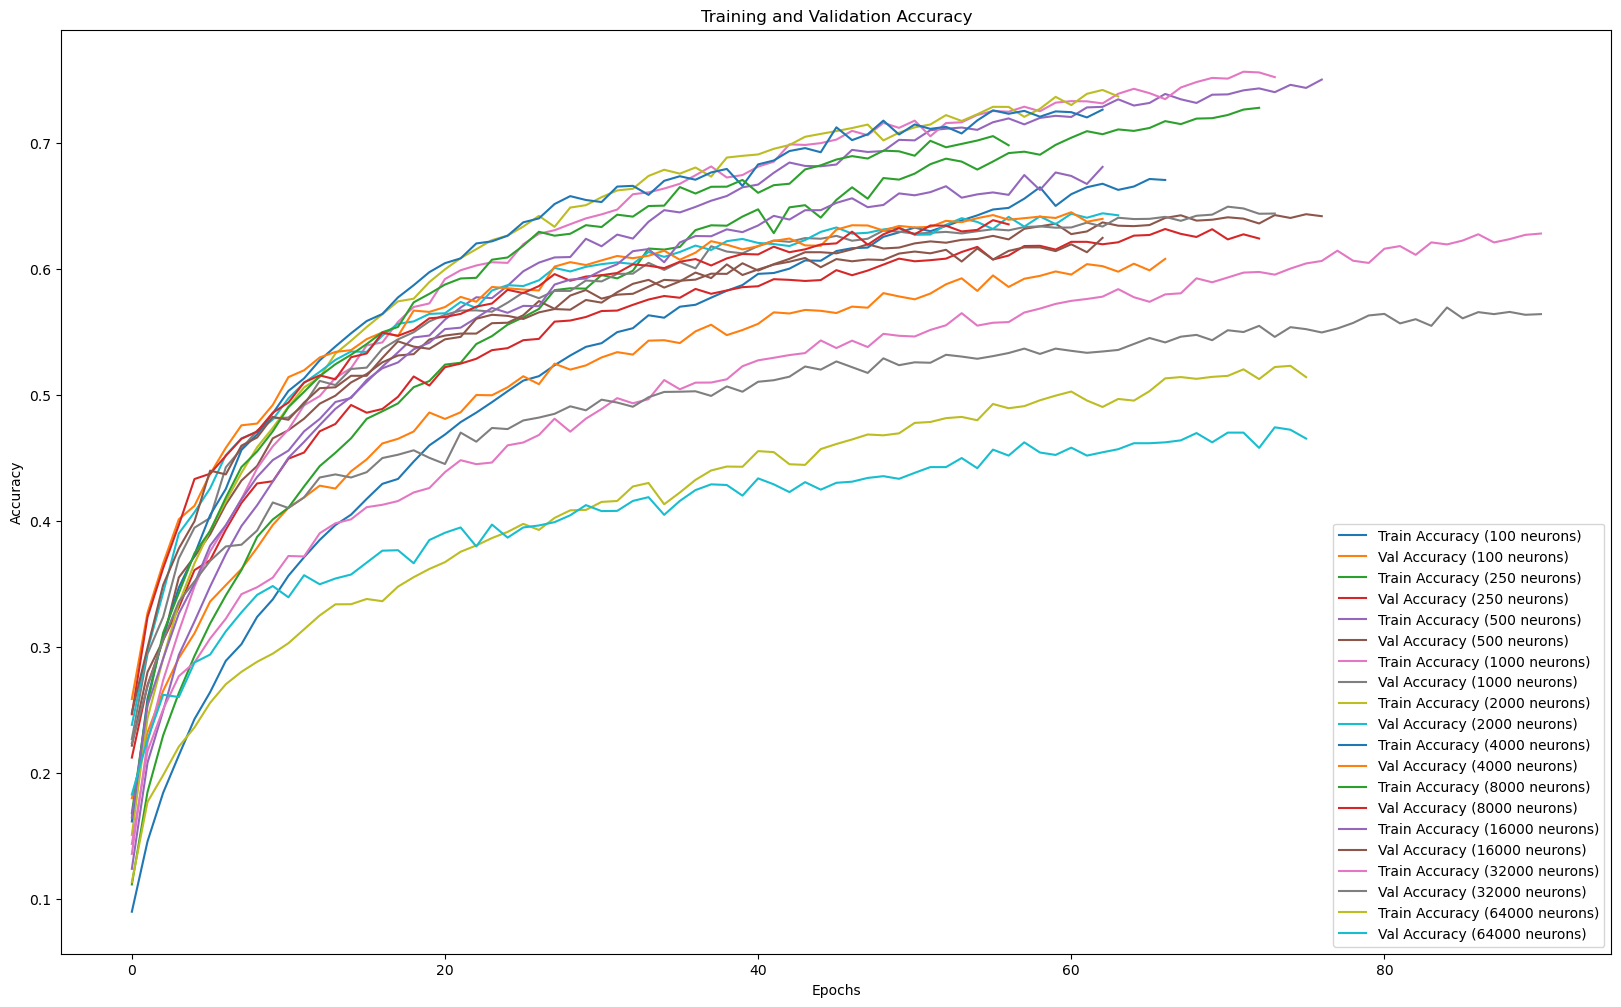

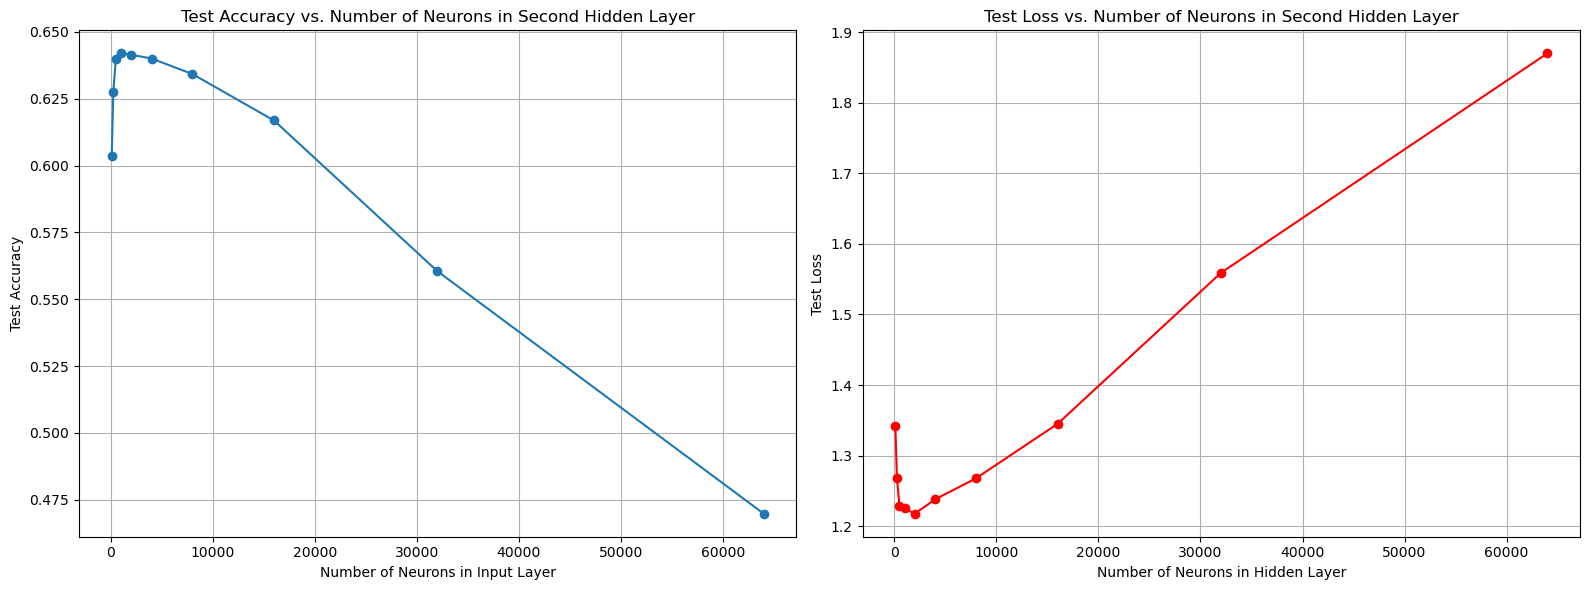

   Neuron Count  Test Accuracy  Test Loss
0           100       0.603509   1.342617
1           250       0.627544   1.268178
2           500       0.639649   1.228971
3          1000       0.641930   1.225345
4          2000       0.641403   1.217727
5          4000       0.640000   1.238065
6          8000       0.634211   1.267868
7         16000       0.616842   1.345088
8         32000       0.560526   1.558924
9         64000       0.469825   1.870004


In [12]:
neuron_counts = [100, 250, 500, 1000, 2000, 4000, 8000, 16000, 32000, 64000]

results = []

plt.figure(figsize=(20, 12))

for neuron_count in neuron_counts:
    print(f"Training model with {neuron_count} neurons in second hidden layer...")

    model, history, test_loss, test_acc = build_and_train_model(neuron_count, X_train, y_train, X_test, y_test, num_classes)

    results.append({"Neuron Count": neuron_count, "Test Accuracy": test_acc, "Test Loss": test_loss})

    plt.plot(history.history['accuracy'], label=f'Train Accuracy ({neuron_count} neurons)')
    plt.plot(history.history['val_accuracy'], label=f'Val Accuracy ({neuron_count} neurons)')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

results_df = pd.DataFrame(results)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].plot(results_df['Neuron Count'], results_df['Test Accuracy'], marker='o')
ax[0].set_xlabel('Number of Neurons in Input Layer')
ax[0].set_ylabel('Test Accuracy')
ax[0].set_title('Test Accuracy vs. Number of Neurons in Second Hidden Layer')
ax[0].grid(True)

ax[1].plot(results_df['Neuron Count'], results_df['Test Loss'], marker='o', color='red')
ax[1].set_xlabel('Number of Neurons in Hidden Layer')
ax[1].set_ylabel('Test Loss')
ax[1].set_title('Test Loss vs. Number of Neurons in Second Hidden Layer')
ax[1].grid(True)

plt.tight_layout()
plt.show()

print(results_df)

Додавання другого прихованого шару не показує суттєвих покращень.

Але наостанок проведемо експеримент з додаванням одразу декількох прихованих шарів, але з каскадним зменшенням нейронів в кожному

In [24]:
def build_and_train_model(X_train, y_train, X_test, y_test, num_classes):
    model = Sequential()
    
    model.add(Dense(2000, input_shape=(X_train.shape[1],), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2000, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(250, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    history = model.fit(
        X_train, y_train,
        epochs=100,
        validation_data=(X_test, y_test),
        batch_size=256,
        callbacks=[early_stopping],
        verbose=0
    )

    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

    return model, history, test_loss, test_acc

Training model with multiple hidden layers...


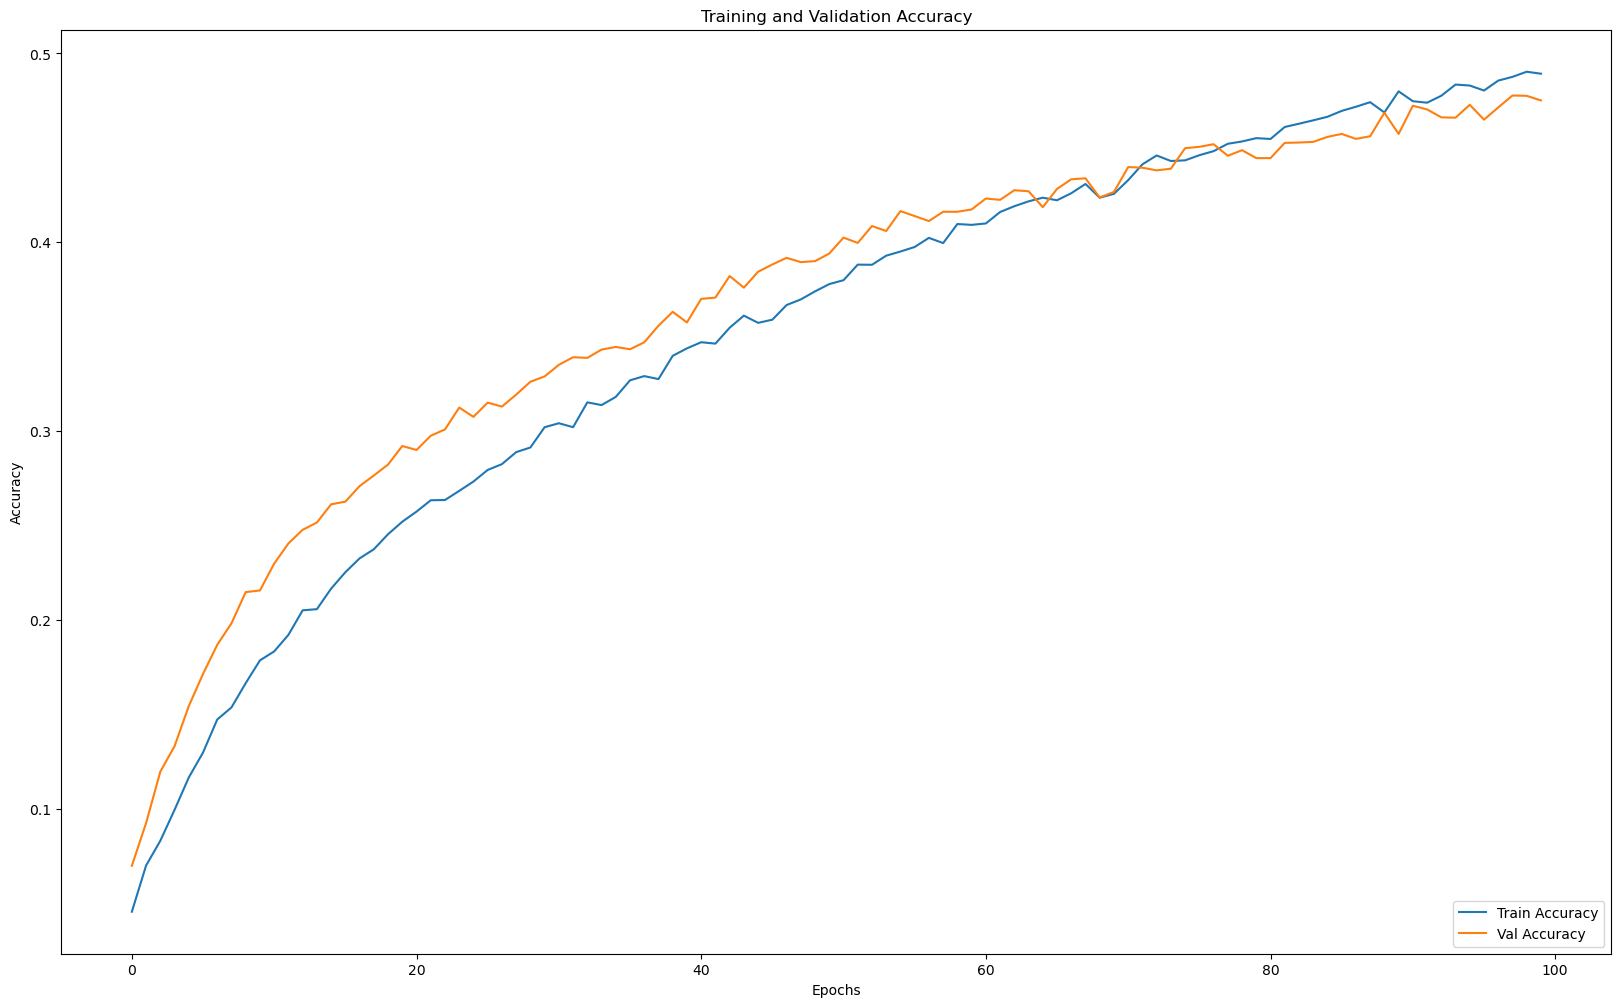

   Test Accuracy  Test Loss
0       0.475088   1.710709


In [25]:
results = []

plt.figure(figsize=(20, 12))

print(f"Training model with multiple hidden layers...")

model, history, test_loss, test_acc = build_and_train_model(X_train, y_train, X_test, y_test, num_classes)

results.append({"Test Accuracy": test_acc, "Test Loss": test_loss})

plt.plot(history.history['accuracy'], label=f'Train Accuracy')
plt.plot(history.history['val_accuracy'], label=f'Val Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

results_df = pd.DataFrame(results)

print(results_df)

Результати переконали в тому що використання двох або більше прихованих шарів не покращить результати моделі. Тому надалі будемо використовувати один прихований шар з 2000 нейронами, але спробуємо тепер зміни інші гіперпараметри.

Додамо L2 регуляризацію

In [29]:
def build_and_train_model(X_train, y_train, X_test, y_test, num_classes):
    model = Sequential()
    
    model.add(Dense(2000, input_shape=(X_train.shape[1],), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dropout(0.5))
    model.add(Dense(2000, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    history = model.fit(
        X_train, y_train,
        epochs=100,
        validation_data=(X_test, y_test),
        batch_size=256,
        callbacks=[early_stopping],
        verbose=0
    )

    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

    return model, history, test_loss, test_acc

Training model with L2 regularization...


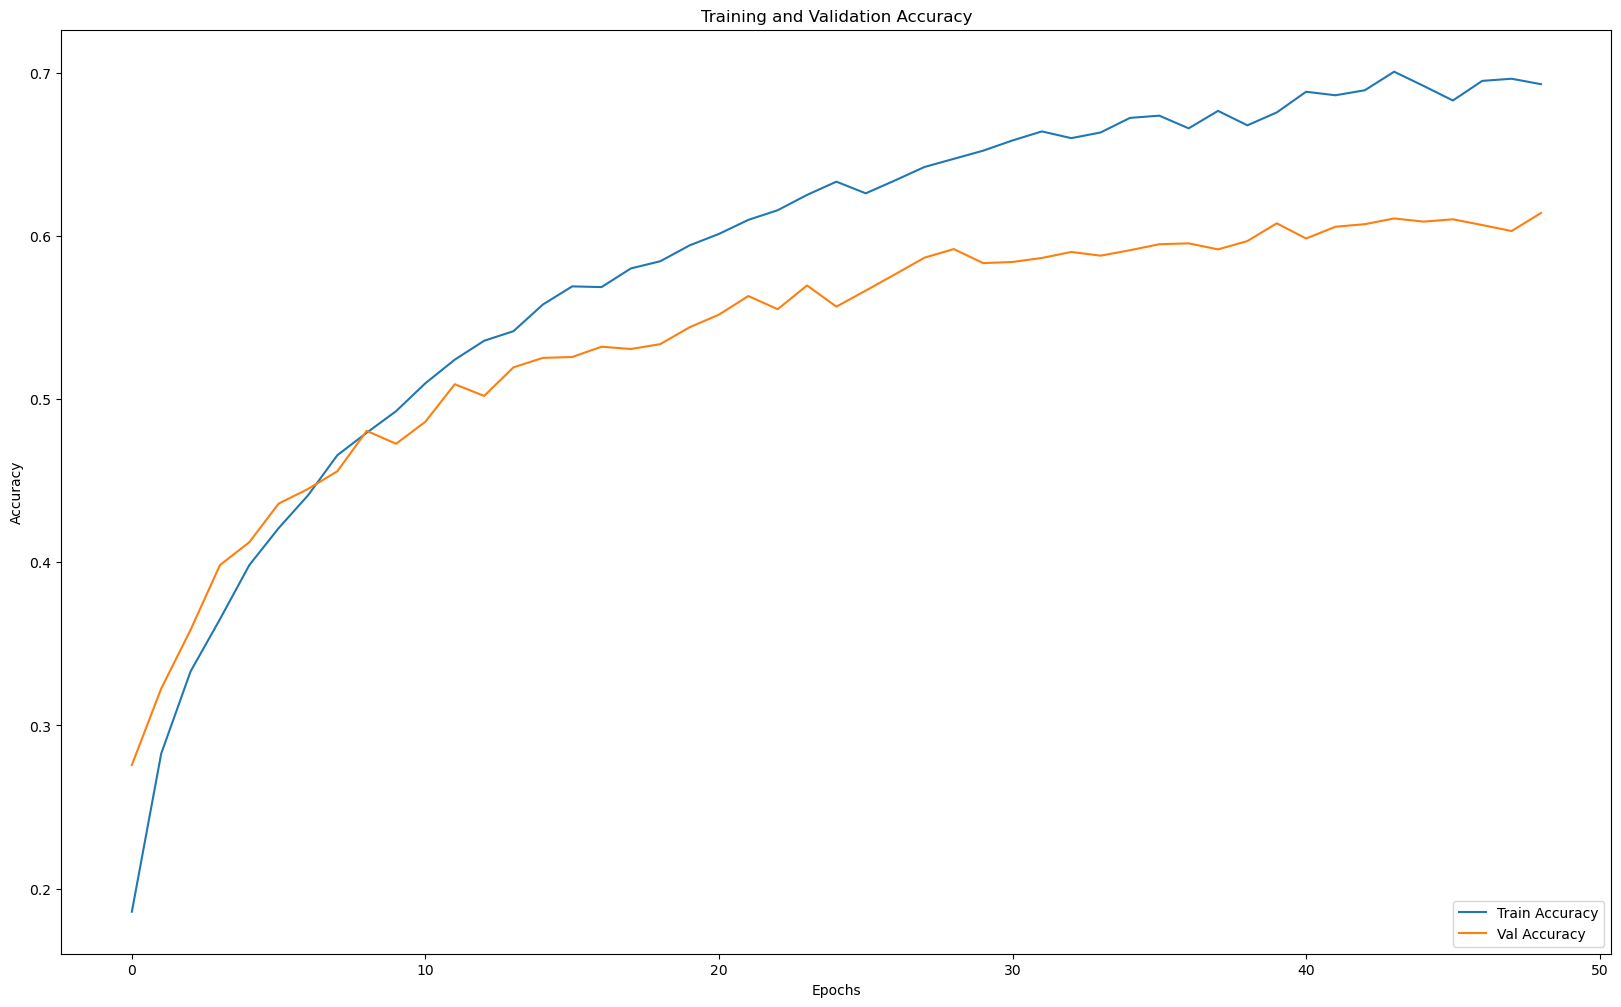

   Test Accuracy  Test Loss
0       0.610702   1.732181


In [30]:
results = []

plt.figure(figsize=(20, 12))

print(f"Training model with L2 regularization...")

model, history, test_loss, test_acc = build_and_train_model(X_train, y_train, X_test, y_test, num_classes)

results.append({"Test Accuracy": test_acc, "Test Loss": test_loss})

plt.plot(history.history['accuracy'], label=f'Train Accuracy')
plt.plot(history.history['val_accuracy'], label=f'Val Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

results_df = pd.DataFrame(results)

print(results_df)

Результат не покращився, спробуємо використати пакетну нормалізацію

In [35]:
def build_and_train_model(X_train, y_train, X_test, y_test, num_classes):
    model = Sequential()
    
    model.add(Dense(2000, input_shape=(X_train.shape[1],), activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(2000, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    history = model.fit(
        X_train, y_train,
        epochs=100,
        validation_data=(X_test, y_test),
        batch_size=256,
        callbacks=[early_stopping],
        verbose=0
    )

    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

    return model, history, test_loss, test_acc

Training model with batch normalization...


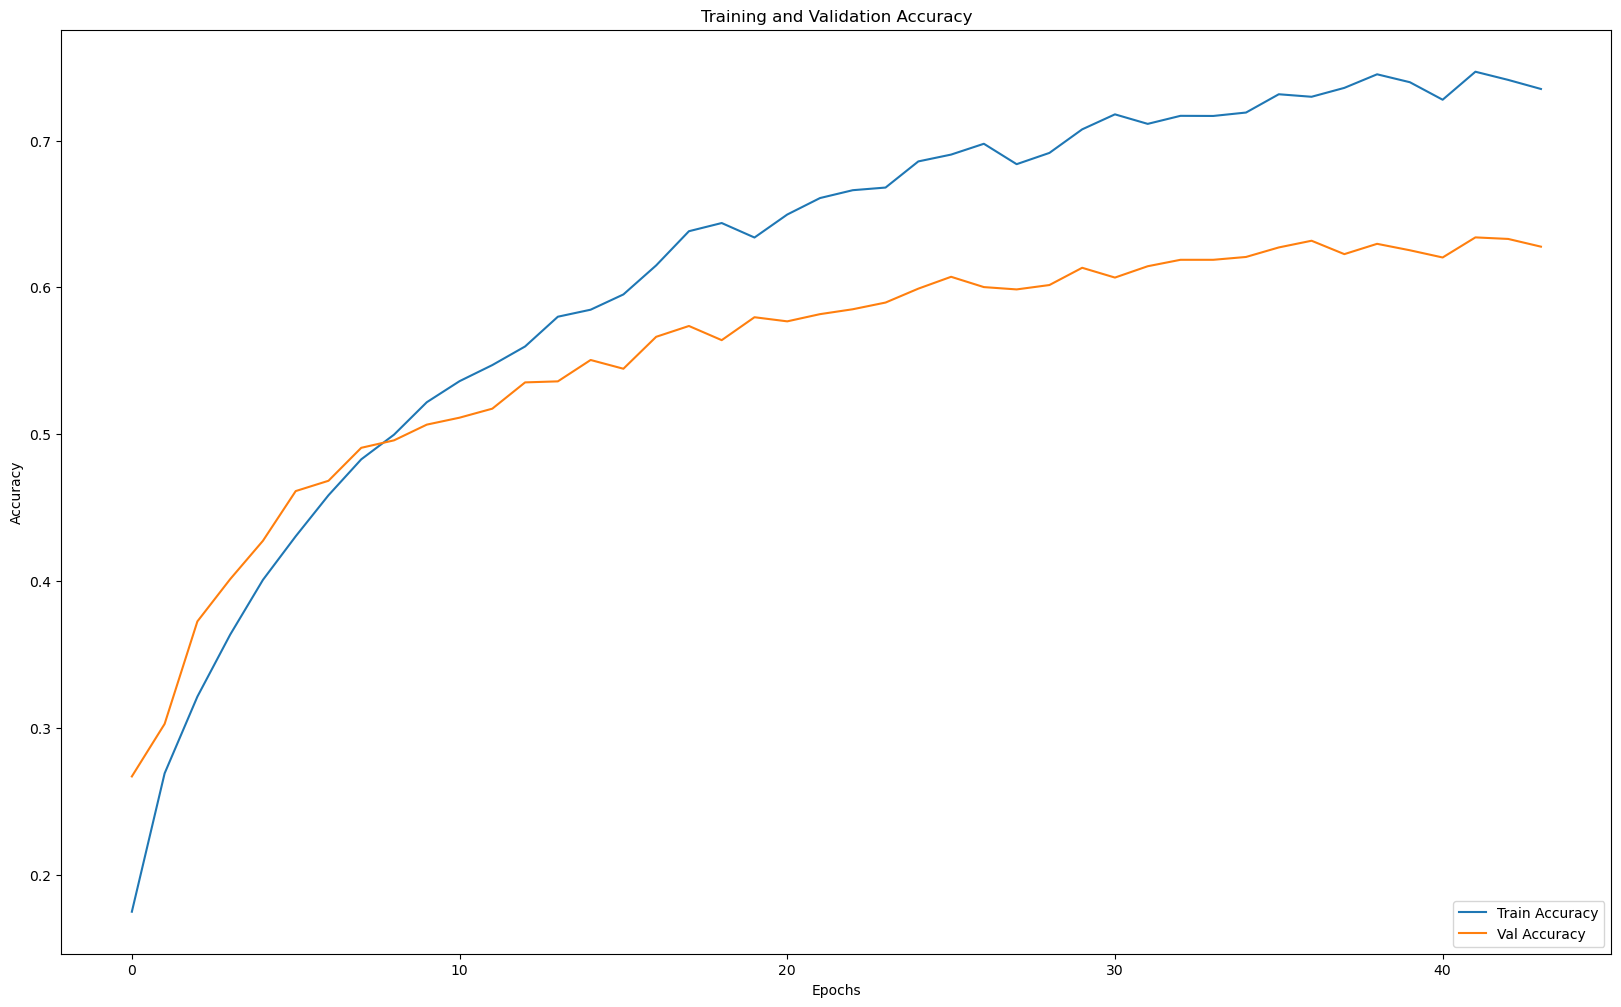

   Test Accuracy  Test Loss
0       0.629649   1.322134


In [37]:
results = []

plt.figure(figsize=(20, 12))

print(f"Training model with batch normalization...")

model, history, test_loss, test_acc = build_and_train_model(X_train, y_train, X_test, y_test, num_classes)

results.append({"Test Accuracy": test_acc, "Test Loss": test_loss})

plt.plot(history.history['accuracy'], label=f'Train Accuracy')
plt.plot(history.history['val_accuracy'], label=f'Val Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

results_df = pd.DataFrame(results)

print(results_df)

Результат не покращився, спробуємо зменшити Dropout до 0.3

In [38]:
def build_and_train_model(X_train, y_train, X_test, y_test, num_classes):
    model = Sequential()
    
    model.add(Dense(2000, input_shape=(X_train.shape[1],), activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(2000, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    history = model.fit(
        X_train, y_train,
        epochs=100,
        validation_data=(X_test, y_test),
        batch_size=256,
        callbacks=[early_stopping],
        verbose=0
    )

    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

    return model, history, test_loss, test_acc

Training model with lower dropout...


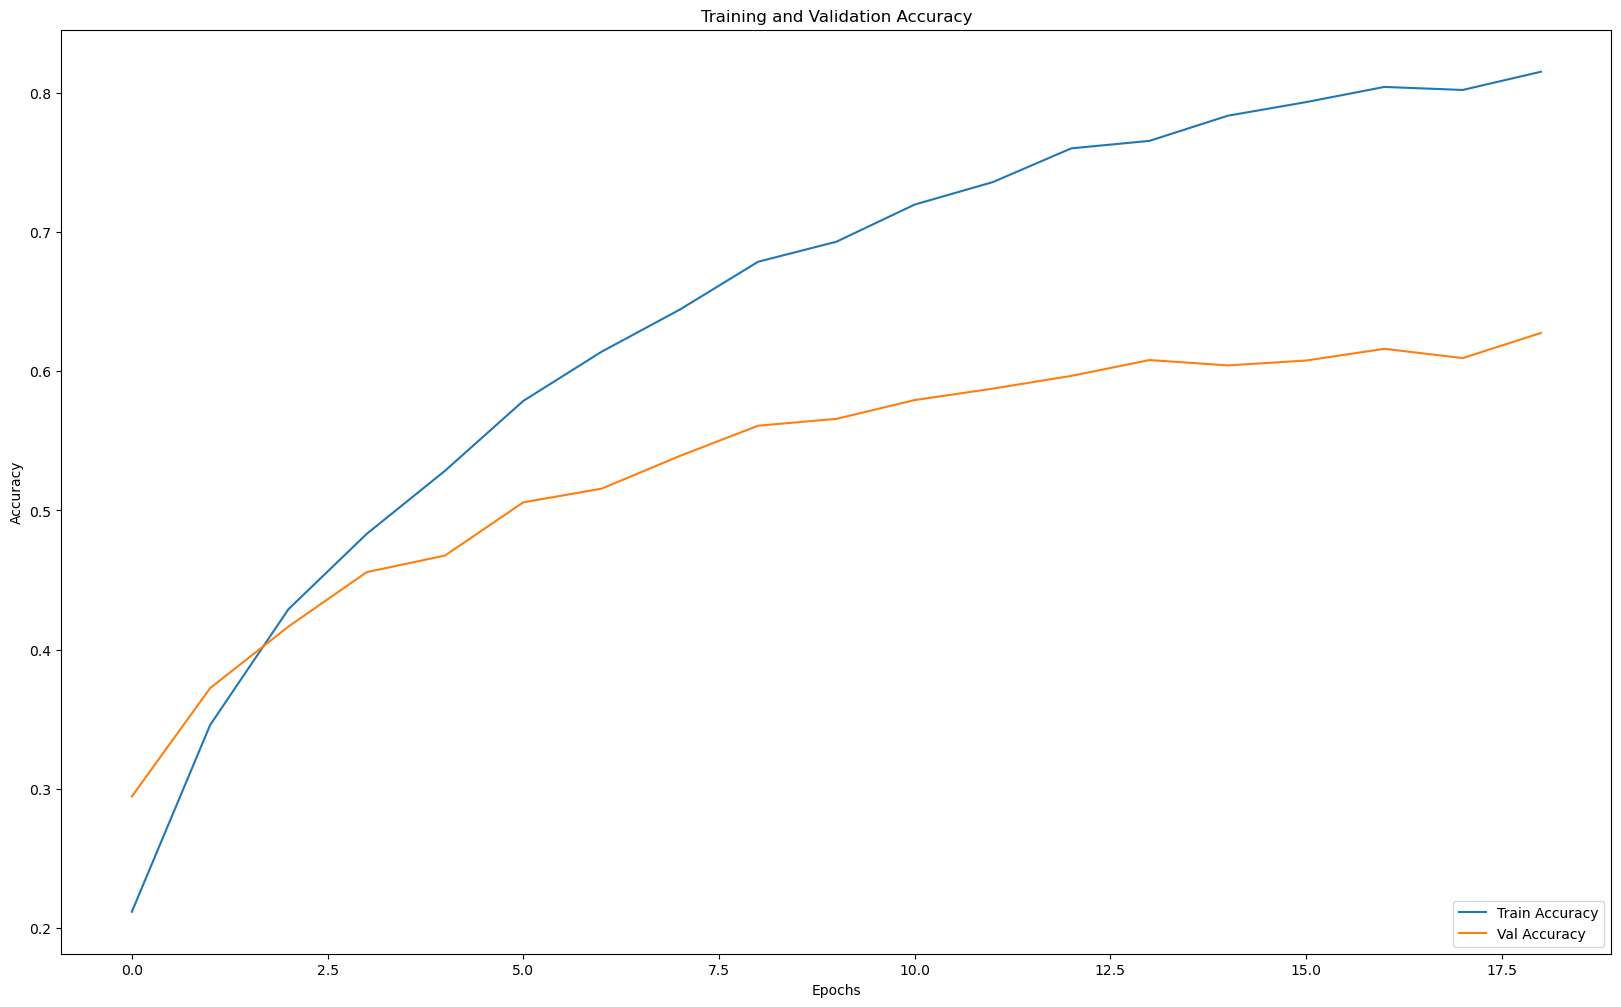

   Test Accuracy  Test Loss
0        0.60807   1.392934


In [39]:
results = []

plt.figure(figsize=(20, 12))

print(f"Training model with lower dropout...")

model, history, test_loss, test_acc = build_and_train_model(X_train, y_train, X_test, y_test, num_classes)

results.append({"Test Accuracy": test_acc, "Test Loss": test_loss})

plt.plot(history.history['accuracy'], label=f'Train Accuracy')
plt.plot(history.history['val_accuracy'], label=f'Val Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

results_df = pd.DataFrame(results)

print(results_df)

Результат не покращився, спробуємо змінити швидкість навчання

In [41]:
def build_and_train_model(rate, X_train, y_train, X_test, y_test, num_classes):
    model = Sequential()
    
    model.add(Dense(2000, input_shape=(X_train.shape[1],), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2000, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=rate), loss='categorical_crossentropy', metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    history = model.fit(
        X_train, y_train,
        epochs=100,
        validation_data=(X_test, y_test),
        batch_size=256,
        callbacks=[early_stopping],
        verbose=0
    )

    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

    return model, history, test_loss, test_acc

Training model with learning rate 0.001...
Training model with learning rate 0.0005...
Training model with learning rate 0.0001...
Training model with learning rate 5e-05...
Training model with learning rate 1e-05...


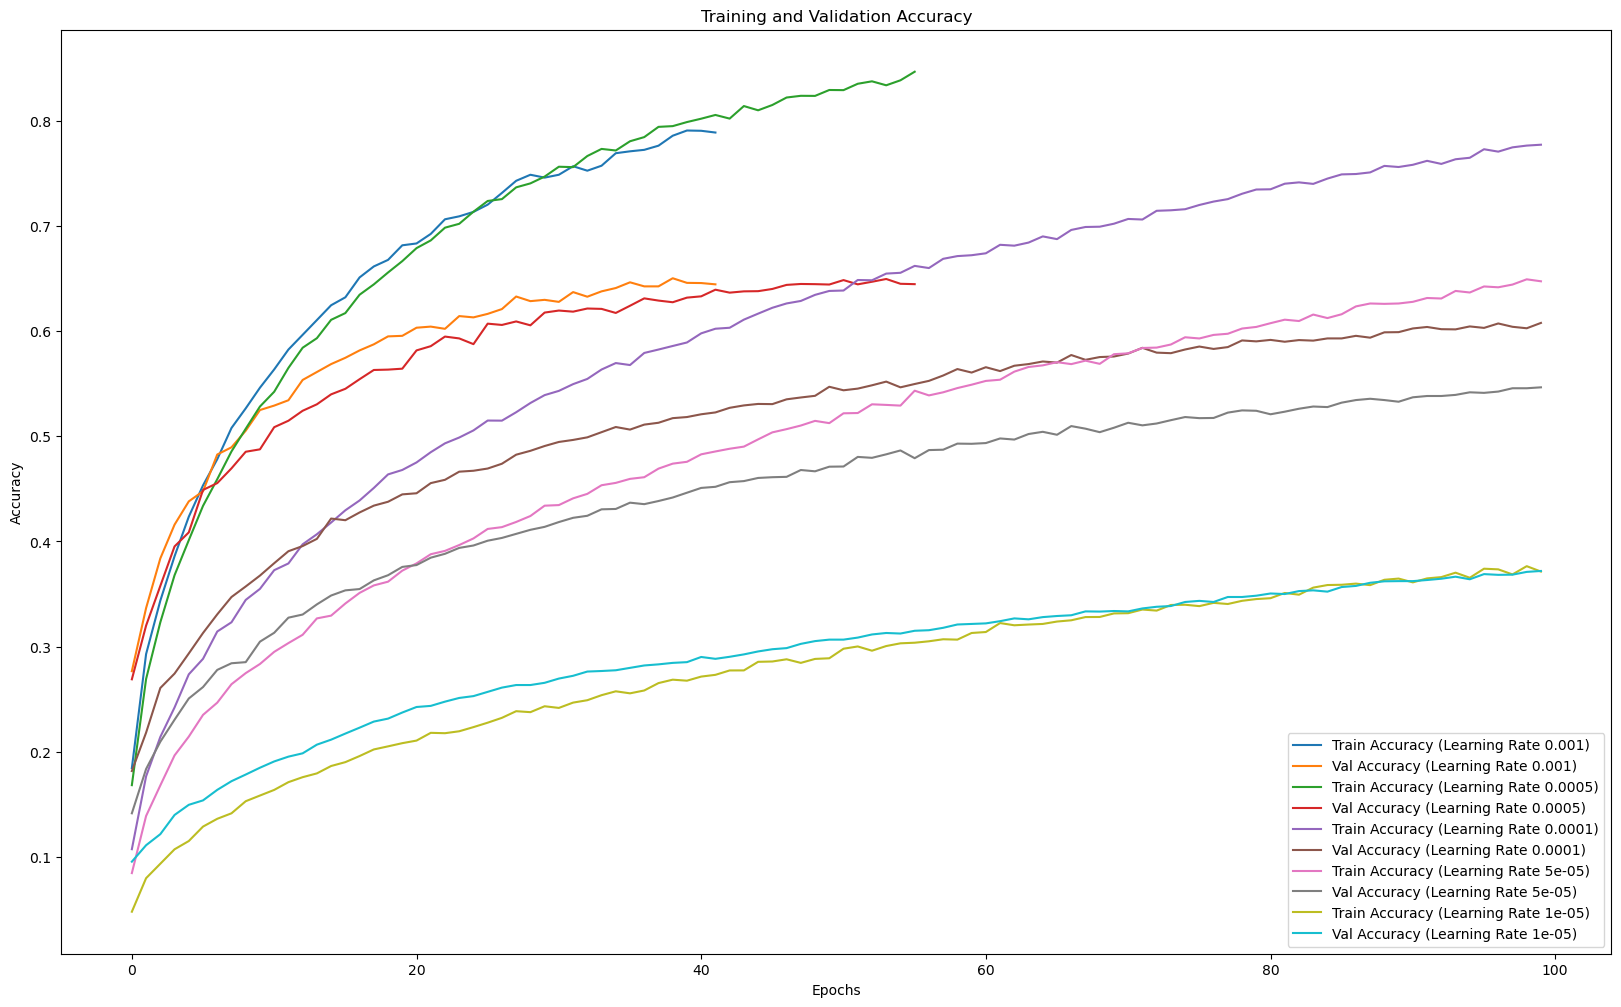

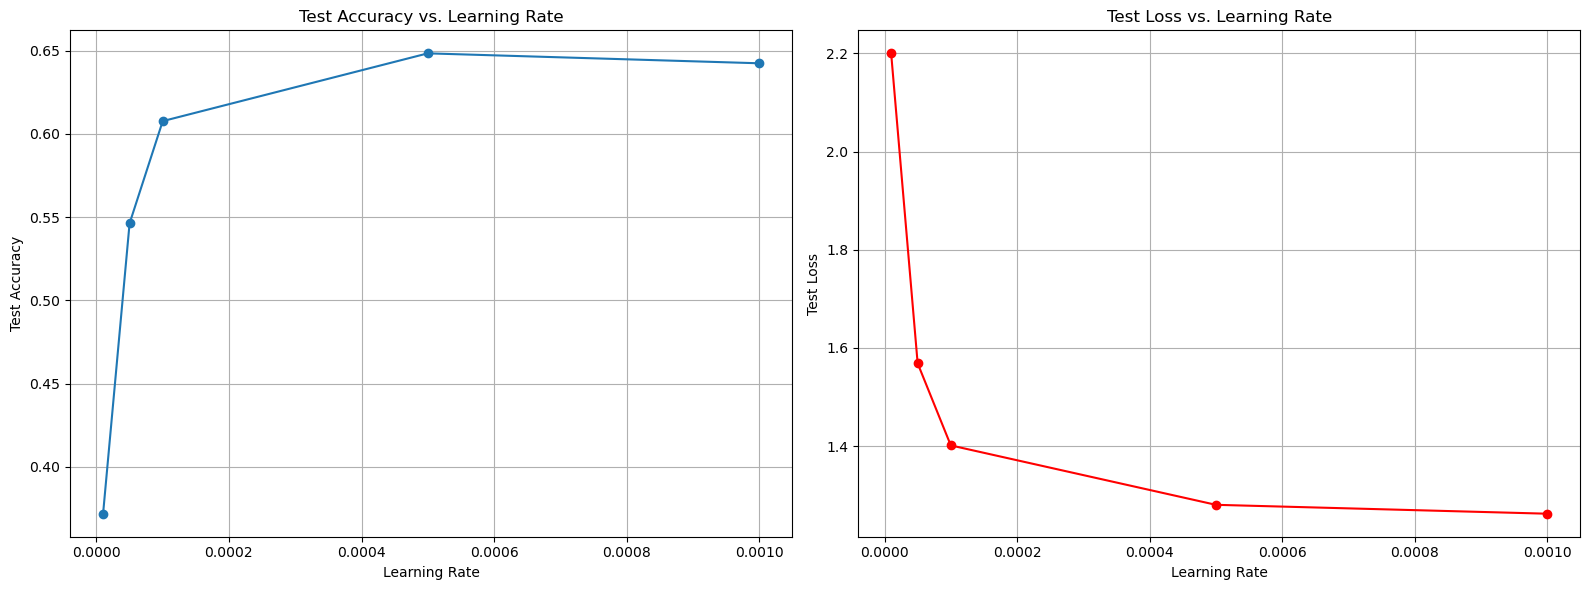

   Learning Rate  Test Accuracy  Test Loss
0        0.00100       0.642456   1.262328
1        0.00050       0.648421   1.280443
2        0.00010       0.607719   1.401459
3        0.00005       0.546316   1.568601
4        0.00001       0.371930   2.200015


In [42]:
rates = [0.001, 0.0005, 0.0001, 0.00005, 0.00001]

results = []

plt.figure(figsize=(20, 12))

for rate in rates:
    print(f"Training model with learning rate {rate}...")

    model, history, test_loss, test_acc = build_and_train_model(rate, X_train, y_train, X_test, y_test, num_classes)

    results.append({"Learning Rate": rate, "Test Accuracy": test_acc, "Test Loss": test_loss})

    plt.plot(history.history['accuracy'], label=f'Train Accuracy (Learning Rate {rate})')
    plt.plot(history.history['val_accuracy'], label=f'Val Accuracy (Learning Rate {rate})')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

results_df = pd.DataFrame(results)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].plot(results_df['Learning Rate'], results_df['Test Accuracy'], marker='o')
ax[0].set_xlabel('Learning Rate')
ax[0].set_ylabel('Test Accuracy')
ax[0].set_title('Test Accuracy vs. Learning Rate')
ax[0].grid(True)

ax[1].plot(results_df['Learning Rate'], results_df['Test Loss'], marker='o', color='red')
ax[1].set_xlabel('Learning Rate')
ax[1].set_ylabel('Test Loss')
ax[1].set_title('Test Loss vs. Learning Rate')
ax[1].grid(True)

plt.tight_layout()
plt.show()

print(results_df)

При використанні швидкості навчання 0.0005 ми збільшили показники точності на 0.7%. Спробуємо провести точне налаштування швидкості навчання

In [132]:
def build_and_train_model(X_train, y_train, X_test, y_test, num_classes):
    model = Sequential()
    
    model.add(Dense(2000, input_shape=(X_train.shape[1],), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2000, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), 
                  loss='categorical_crossentropy', metrics=['accuracy'])
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

    history = model.fit(
        X_train, y_train,
        epochs=100,
        validation_data=(X_test, y_test),
        batch_size=256,
        callbacks=[early_stopping, reduce_lr],
        verbose=0
    )

    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

    return model, history, test_loss, test_acc

Training model with fine-tuning learning rate...


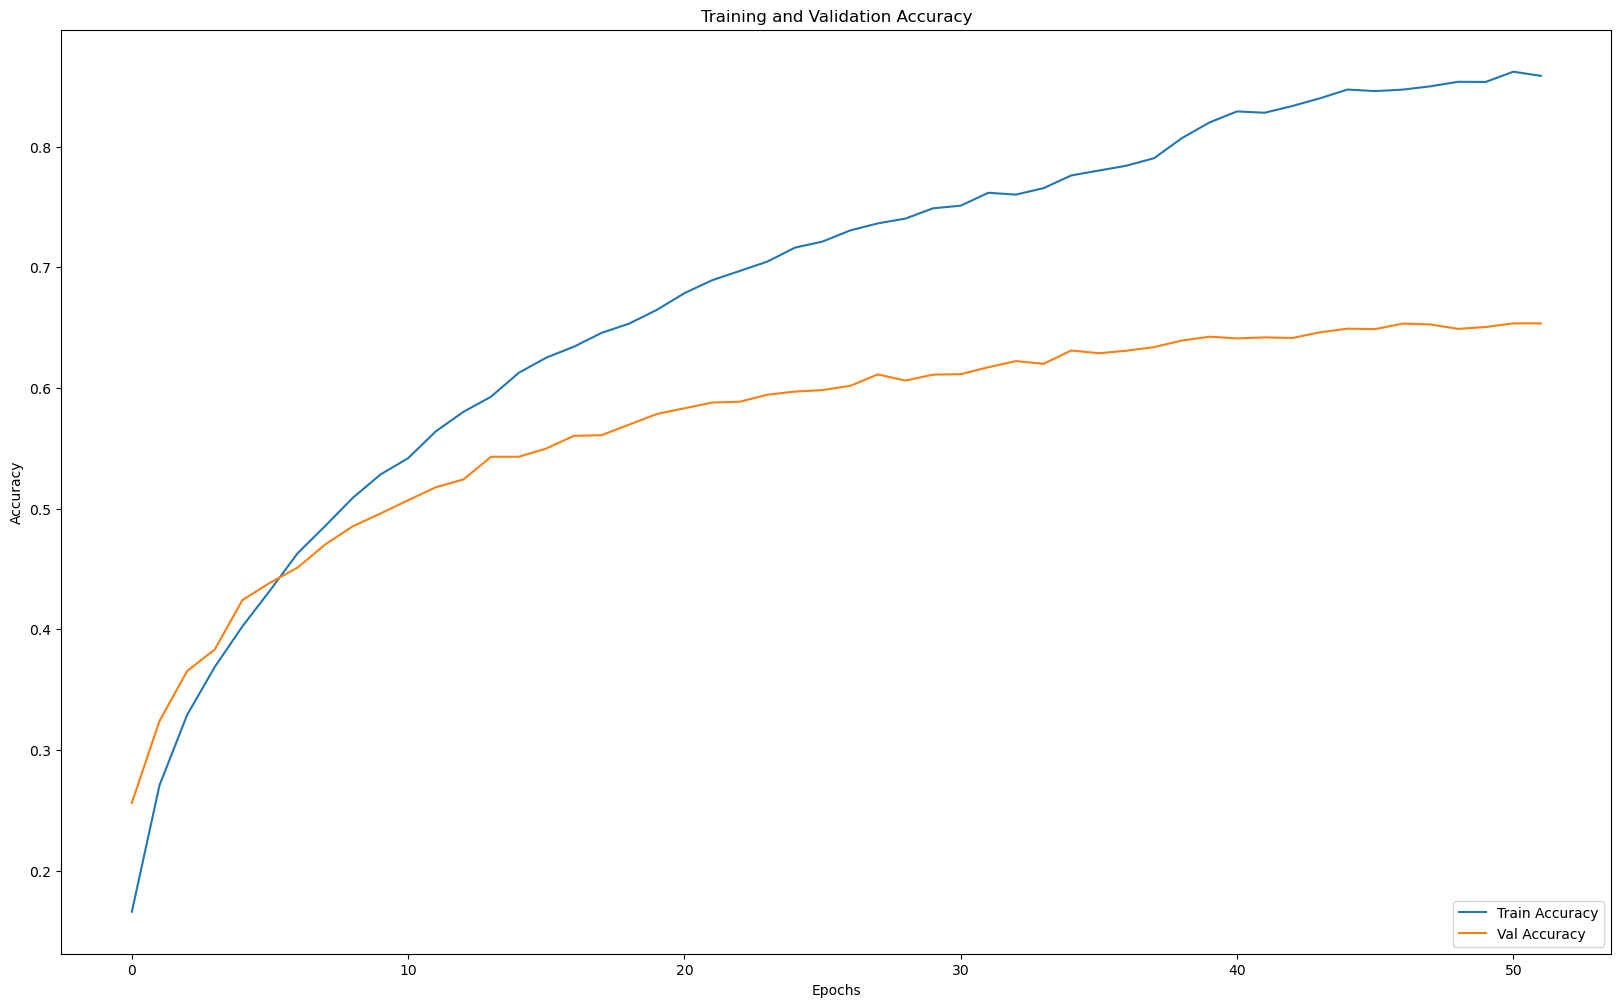

   Test Accuracy  Test Loss
0       0.653333   1.266329


In [133]:
results = []

plt.figure(figsize=(20, 12))

print(f"Training model with fine-tuning learning rate...")

model, history, test_loss, test_acc = build_and_train_model(X_train, y_train, X_test, y_test, num_classes)

results.append({"Test Accuracy": test_acc, "Test Loss": test_loss})

plt.plot(history.history['accuracy'], label=f'Train Accuracy')
plt.plot(history.history['val_accuracy'], label=f'Val Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

results_df = pd.DataFrame(results)

print(results_df)

В результаті тонкого налаштування швидкості навчання ми збільшили показники точності ще на 0.7%. В результаті маємо модель з точністю в 65,3333%. Експортуємо її для подальших досліджень.

In [134]:
model.save('./models/font-recognizer-v1.h5')